# Binary Classification: when it's a 5?

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
vector_images, labels = mnist["data"].values, mnist["target"].values # convert from pandas to numpy
labels = labels.astype(int)

## Prepare the train dataset

In [5]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3 #30% of the dataset

vector_images_train, vector_images_test, labels_train, labels_test = train_test_split(vector_images, labels, test_size=TEST_SIZE)

vector_images_test.shape

(21000, 784)

In [6]:
labels_train_5 = (labels_train == 5) # Prepare to train, 5 = True, otherwise False
labels_train_5

array([ True, False, False, ..., False, False, False], shape=(49000,))

In [7]:
import pandas as pd

pd.Series(labels_train_5).value_counts()

False    44656
True      4344
Name: count, dtype: int64

## Train the Stochastic Gradient Descent Classifier model

**How it works:**
- Trains the model by processing **one sample at a time** (or small batches)
- Updates the model's weights gradually during training
- Is efficient for large datasets like MNIST
- Works well for binary classification (like detecting if an image is the digit 5 or not)
- It's not specifically binary, it can be used for multi-class classification

**Advantages:**
- Fast to train
- Uses little memory
- Works well with large datasets
- Good for linear classification problems

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(vector_images_train, labels_train_5) # Train the model. "Using the vector_images_train, you should learn the labels_train."

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


## Validate the model

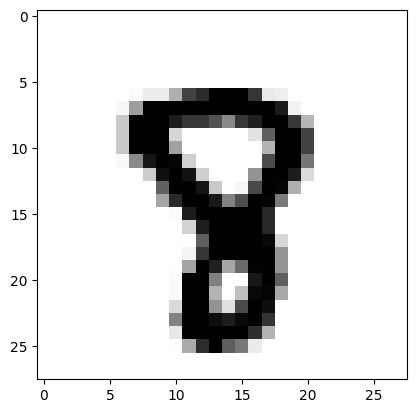

Train label: False
AI label: [False]


In [9]:
n = 30

plt.imshow(vector_images_train[n].reshape(28, 28), cmap='binary')
plt.show()

print("Train label:", labels_train_5[n])
print("AI label:", sgd_clf.predict([vector_images_train[n]]))

## Use cross-validation to evaluate the model

In [10]:
from sklearn.model_selection import cross_val_score

FOLDS_NUM = 3 # How many rounds of cross-validation to do
cross_val_score(sgd_clf, vector_images_train, labels_train_5, cv=FOLDS_NUM, scoring="accuracy")

array([0.94159422, 0.95150921, 0.93375375])

~94% of accuracy, it's very bad because the dataset is very unbalanced and the tests was using the same dataset to train.

## Calculating the confusion matrix

### True negative - False positive
### False negative - True positive










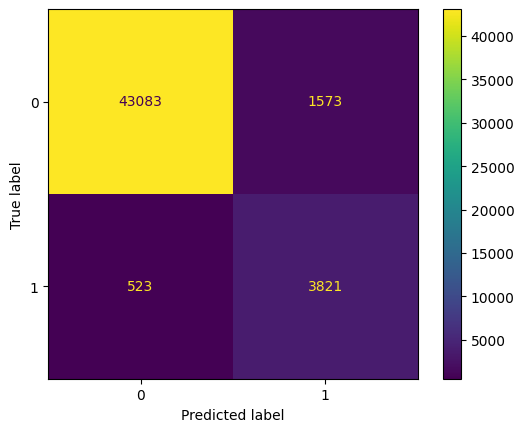

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(labels_train_5, sgd_clf.predict(vector_images_train))

ConfusionMatrixDisplay(cm).plot()
plt.show()

## Calculating the precision and recall score

In [18]:
from sklearn.metrics import precision_score, recall_score

model_pred = sgd_clf.predict(vector_images_train)

ps = precision_score(labels_train_5, model_pred)
rs = recall_score(labels_train_5, model_pred)

print(f"Precision: {ps*100:.2f}%") 
print(f"Recall: {rs*100:.2f}%") # of all attempts, how many were correct?

Precision: 70.84%
Recall: 87.96%


## Classification report
Calculate the precision, recall, f1-score and support for each class (True and False, in this case)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(labels_train_5, model_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98     44656
        True       0.71      0.88      0.78      4344

    accuracy                           0.96     49000
   macro avg       0.85      0.92      0.88     49000
weighted avg       0.96      0.96      0.96     49000

